__The input file contains the following fields:__

__DB Metadata__
| Name    | Description |
| -------- | ------- |
| UID  | Unique ID of the owning application    |
| DBType | Type of the Databse (MSSQL, MySQL, Oracle, DB2)     |
| Instance    | The instance of the Ddtabase |
| DBName | The name of the database |
| Schema | The schema where the table os located in the database |
| Table | The name of the table |
| Column | The name of a single column |
| ColumnType | The datatyp of the column |

__Application Metadata__
| Name    | Description |
| -------- | ------- |
|Anwendung|The name of the application|
|UID|Unique ID of the application    |
|Stereotyp RCH| the type application (e.g. Business-Applikation, Infrastructure) |
|Massen-CID|whether the application deals with CID|

| DB | UID |    DBType | Instance |    DBName |      Schema |      Table |           Column |         ColumnType | 
| ----- | ----- |    ----- | ----- |    ----- |      ----- |      ----- |           ----- |         ----- | 
| __MSSQL__ | UID |    DBType | Instance |    DBName |      Schema |      Table |           Column |         ColumnType | 
| __Oracle__ | uid |   dbtype |   |           dbname |      owner |       table_name |      column_name |     data_type |
| __MySQL__ | uid |    dbtype |    |          dbname |      owner |       table_name |      column_name |     data_type | 
| __FINAL COLUMN NAMES__ | UID | DB_TYPE | _droped_ | DB_NAME | SCHEMA |  TABLE_NAME | COLUMN_NAME | DATA-TYPE | 

In [75]:
!pip install pyLDAvis
!pip install wordninja
!pip install lingua-language-detector
!pip install textblob
!pip install HanTa
# !pip install translate

/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=6596) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=6596) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=6596) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=6596) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=6596) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


# Prepare the data

we have metadata about MSSQL, Oracle and MySQL Instances in CSV compressed in ZIP files - these CSVs must be merged into the same structure

In [76]:
# remove the existing data files
!rm -f data/*.csv  
!rm -f data/*.dic
!rm -f data/*.txt

# extract the german dictory used for word splitting
!unzip data/german.zip german.dic -d data

# unzip the data files avialable
!unzip -o data/mssql_allprod_collumns.zip -d data/
!unzip -o data/oracle_metadata.zip -d data/
!unzip -o data/mysql_metadata.zip -d data/
!unzip -o data/UID_AppName_Mapping.zip -d data/

/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=6596) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()
/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=6596) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


zsh:1: no matches found: data/*.txt


/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=6596) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Archive:  data/german.zip
  inflating: data/german.dic         

/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=6596) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()



Archive:  data/mssql_allprod_collumns.zip
  inflating: data/mssql_allprod_collumns.csv  

/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=6596) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()



Archive:  data/oracle_metadata.zip
  inflating: data/oracle_metadata.csv  

/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=6596) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()



Archive:  data/mysql_metadata.zip
  inflating: data/mysql_metadata.csv  


/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=6596) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Archive:  data/UID_AppName_Mapping.zip
  inflating: data/UID_AppName_Mapping.csv  


/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=6596) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


In [77]:
%%bash
# Prepare MSSQL data

INPUT_FILE="data/mssql_allprod_collumns.csv"
OUTPUT_FILE="data/mssql_allprod_collumns_no_third_column.csv.tmp"

head -3 $INPUT_FILE

# because the column separator is ',', we need to make sure e.g. `numeric(17,10)` is replaced with `numeric(17;10)` in the csv file
sed -E 's/\(([^)]*),([^)]*)\)/(\1;\2)/g' ${INPUT_FILE} > ${OUTPUT_FILE}
echo "The file ${INPUT_FILE} has been processed and saved as ${OUTPUT_FILE}"

# drop the third column ('Instance') from the csv file (it does not exist in the other files)
# Use awk to drop the third column
awk -F, 'BEGIN {OFS=","} { $3=""; sub(",,", ","); print }' ${OUTPUT_FILE} > ${INPUT_FILE}

rm ${OUTPUT_FILE}

echo "The file ${INPUT_FILE} has been processed, the third column has been removed:"
head -3 $INPUT_FILE

UID,DBType,Instance,DBName,Schema,Table,Column,ColumnType
30230,MSSQL,R0015702\RCHSCOMP02,OperationsManagerDW,State,StateHourly_D461F6AFA87B4259B908B29DA01EDE5C,InRedStateMilliseconds,int
30230,MSSQL,R0015702\RCHSCOMP02,OperationsManagerDW,State,StateHourly_D461F6AFA87B4259B908B29DA01EDE5C,InYellowStateMilliseconds,int
The file data/mssql_allprod_collumns.csv has been processed and saved as data/mssql_allprod_collumns_no_third_column.csv.tmp
The file data/mssql_allprod_collumns.csv has been processed, the third column has been removed:
﻿UID,DBType,DBName,Schema,Table,Column,ColumnType
30230,MSSQL,OperationsManagerDW,State,StateHourly_D461F6AFA87B4259B908B29DA01EDE5C,InRedStateMilliseconds,int
30230,MSSQL,OperationsManagerDW,State,StateHourly_D461F6AFA87B4259B908B29DA01EDE5C,InYellowStateMilliseconds,int


In [78]:
%%bash
# prepare Oracle data
INPUT_FILE="data/oracle_metadata.csv"
OUTPUT_FILE="data/oracle_metadata.csv.tmp"

# the data of one table contains strange column names, remove its columns
sed '/RFA772203/d' $INPUT_FILE > $OUTPUT_FILE

mv $OUTPUT_FILE $INPUT_FILE
rm -f $OUTPUT_FILE

In [79]:
%%bash
# create the dataset to use for the analysis

# the number of records to use for each DB type, set to '-1' to use all records
NR_OF_RECORDS_EACH=50000

TARGET_FILE="data/db_metadata.csv"
echo "Creating the dataset..."

# drop the first line (column names) from the files (except the one from MSSQL)
tail -n +2 data/oracle_metadata.csv > data/oracle_metadata.csv.tmp
tail -n +2 data/mysql_metadata.csv > data/mysql_metadata.csv.tmp

mv data/oracle_metadata.csv.tmp data/oracle_metadata.csv
mv data/mysql_metadata.csv.tmp data/mysql_metadata.csv

if [ $NR_OF_RECORDS_EACH -gt 0 ]; then
    echo "Creating a small dataset with ${NR_OF_RECORDS_EACH} records of each files"
    head -${NR_OF_RECORDS_EACH} data/mssql_allprod_collumns.csv  >  ${TARGET_FILE}
    head -${NR_OF_RECORDS_EACH} data/oracle_metadata.csv         >> ${TARGET_FILE}
    head -${NR_OF_RECORDS_EACH} data/mysql_metadata.csv          >> ${TARGET_FILE}
else
    echo "Creating a dataset with all records of each files"
    cat data/mssql_allprod_collumns.csv data/oracle_metadata.csv data/mysql_metadata.csv > ${TARGET_FILE}
fi

NR_OF_LINES=$(wc -l ${TARGET_FILE})
echo "new dataset contains ${NR_OF_LINES}"

Creating the dataset...
Creating a small dataset with 50000 records of each files
new dataset contains   147425 data/db_metadata.csv


In [80]:
# Importing the required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import LatentDirichletAllocation
import wordninja
# from nltk.corpus import stopwords

In [81]:
# Load the data
df = pd.read_csv('data/db_metadata.csv')
display(df.head())

uidMapping = pd.read_csv('data/UID_AppName_Mapping.csv')

# merge the data with the mapping data
df = df.merge(uidMapping, on='UID', how='left')

# drop unused columns
df.drop(columns=['Stereotyp RCH'], inplace=True)

# for more flexibility when selecting the data file, we rename the columns to be the same for all
new_column_names = {
    df.columns[0]: 'UID',  
    df.columns[1]: 'DB_TYPE',
    df.columns[2]: 'DB_NAME',
    df.columns[3]: 'SCHEMA',
    df.columns[4]: 'TABLE_NAME',
    df.columns[5]: 'COLUMN_NAME',
    df.columns[6]: 'DATA_TYPE',
    df.columns[7]: 'APPLICATION_NAME',
    df.columns[8]: 'MASS_CID',
}
df.rename(columns=new_column_names, inplace=True)

display(df.head())

,UID,DBType,DBName,Schema,Table,Column,ColumnType
0,30230,MSSQL,OperationsManagerDW,State,StateHourly_D461F6AFA87B4259B908B29DA01EDE5C,InRedStateMilliseconds,int
1,30230,MSSQL,OperationsManagerDW,State,StateHourly_D461F6AFA87B4259B908B29DA01EDE5C,InYellowStateMilliseconds,int
2,30230,MSSQL,OperationsManagerDW,State,StateHourly_D461F6AFA87B4259B908B29DA01EDE5C,InDisabledStateMilliseconds,int
3,30230,MSSQL,OperationsManagerDW,State,StateHourly_D461F6AFA87B4259B908B29DA01EDE5C,InPlannedMaintenanceMilliseconds,int
4,30230,MSSQL,OperationsManagerDW,State,StateHourly_D461F6AFA87B4259B908B29DA01EDE5C,InUnplannedMaintenanceMilliseconds,int


,UID,DB_TYPE,DB_NAME,SCHEMA,TABLE_NAME,COLUMN_NAME,DATA_TYPE,APPLICATION_NAME,MASS_CID
0,30230,MSSQL,OperationsManagerDW,State,StateHourly_D461F6AFA87B4259B908B29DA01EDE5C,InRedStateMilliseconds,int,System Center Operations Manager (SCOM),N
1,30230,MSSQL,OperationsManagerDW,State,StateHourly_D461F6AFA87B4259B908B29DA01EDE5C,InYellowStateMilliseconds,int,System Center Operations Manager (SCOM),N
2,30230,MSSQL,OperationsManagerDW,State,StateHourly_D461F6AFA87B4259B908B29DA01EDE5C,InDisabledStateMilliseconds,int,System Center Operations Manager (SCOM),N
3,30230,MSSQL,OperationsManagerDW,State,StateHourly_D461F6AFA87B4259B908B29DA01EDE5C,InPlannedMaintenanceMilliseconds,int,System Center Operations Manager (SCOM),N
4,30230,MSSQL,OperationsManagerDW,State,StateHourly_D461F6AFA87B4259B908B29DA01EDE5C,InUnplannedMaintenanceMilliseconds,int,System Center Operations Manager (SCOM),N


# Utilities

In [82]:
from lingua import Language, LanguageDetectorBuilder

# build a language detector to detect English and German
langdetector = LanguageDetectorBuilder.from_languages(
        Language.ENGLISH, 
        Language.GERMAN
    ).build()

# function to detect if a word is German
def isGerman(word):
    detected_lang = langdetector.detect_language_of(word)
    if detected_lang == Language.GERMAN:
        return True
    else:
        return False

### Prepare the data

In [83]:
# drop columns of known special tables that are not relevant for the analysis
df = df[~df['TABLE_NAME'].str.lower().str.contains('flyway') # flyway schema history
        & ~df['TABLE_NAME'].str.lower().str.contains('qrtz') # quartz scheduler
        & ~df['TABLE_NAME'].str.lower().str.contains('shedlock') # shedlock
        & ~df['TABLE_NAME'].str.lower().str.contains('jobrunr') # jobrunr
        & ~df['TABLE_NAME'].str.lower().str.contains('batch_') # spring batch
        & ~df['TABLE_NAME'].str.lower().str.contains('databasechangelog') # liquibase
        ]


In [84]:
display(df.head())

,UID,DB_TYPE,DB_NAME,SCHEMA,TABLE_NAME,COLUMN_NAME,DATA_TYPE,APPLICATION_NAME,MASS_CID
0,30230,MSSQL,OperationsManagerDW,State,StateHourly_D461F6AFA87B4259B908B29DA01EDE5C,InRedStateMilliseconds,int,System Center Operations Manager (SCOM),N
1,30230,MSSQL,OperationsManagerDW,State,StateHourly_D461F6AFA87B4259B908B29DA01EDE5C,InYellowStateMilliseconds,int,System Center Operations Manager (SCOM),N
2,30230,MSSQL,OperationsManagerDW,State,StateHourly_D461F6AFA87B4259B908B29DA01EDE5C,InDisabledStateMilliseconds,int,System Center Operations Manager (SCOM),N
3,30230,MSSQL,OperationsManagerDW,State,StateHourly_D461F6AFA87B4259B908B29DA01EDE5C,InPlannedMaintenanceMilliseconds,int,System Center Operations Manager (SCOM),N
4,30230,MSSQL,OperationsManagerDW,State,StateHourly_D461F6AFA87B4259B908B29DA01EDE5C,InUnplannedMaintenanceMilliseconds,int,System Center Operations Manager (SCOM),N


TODO:
- ~~also remove all numbers from the text~~
- ~~lowercase the text~~
- ~~add table name to DOCUMENT_CONTENT~~
- ~~german vs english~~
~~'CMZKE_KUNDE' -> KUN, should be: KUNDE~~
- german to english translation
- ~~lemmatizing ([germalemma](https://github.com/WZBSocialScienceCenter/germalemma) vs spacy vs HanoverTagger)~~

In [85]:
from textblob import Word
from HanTa import HanoverTagger as ht
from translate import Translator

translator = Translator(from_lang='en', to_lang='de')
tagger = ht.HanoverTagger('morphmodel_ger.pgz')

def lemmatizeGerman(word):
    lemma = tagger.analyze(word)
    return lemma[0]

def checkLengthAndIsNotNumber(word):
    if len(word) > 3 and not word.isdigit():
        return True
    return False

# function to split a string into words, filter out short words (less than 4 characters) and numbers, and lemmatize the words
def splitToWordsAndFilter(x):
    if pd.notnull(x) and x:
        words = []
        if not isGerman(x):
            words = wordninja.split(x)
            words = [Word(word).lemmatize() for word in words if checkLengthAndIsNotNumber(word)]
        else:
            words = x.split('_')
            words = [lemmatizeGerman(word) for word in words if checkLengthAndIsNotNumber(word)]

        return ' '.join(words).lower()
    return ''

# split the column names 
df['DOCUMENT_CONTENT'] = df['COLUMN_NAME'].apply(
    lambda x: splitToWordsAndFilter(x)
)

# - Concatenate 'COLUMN_NAME' values for rows with the same 'DB_NAME'/'TABLE_NAME' combination
# - lowercase the text
df_grouped = df.groupby(['UID', 'APPLICATION_NAME', 'DB_TYPE', 'DB_NAME', 'TABLE_NAME', 'MASS_CID'])['DOCUMENT_CONTENT'].agg(
    lambda x: ' '.join(x)
).reset_index()


df_grouped['TABLE_NAME_CONTENT'] = df_grouped['TABLE_NAME'].apply(
    lambda x: splitToWordsAndFilter(x)
)

df_grouped['DOCUMENT_CONTENT'] = df_grouped['TABLE_NAME_CONTENT'] + ' ' + df_grouped['DOCUMENT_CONTENT']


display(df_grouped.head())

,UID,DB_TYPE,DB_NAME,TABLE_NAME,MASS_CID,DOCUMENT_CONTENT,TABLE_NAME_CONTENT
0,12,MSSQL,RET_RETo_P,BATCH_JOB_EXECUTION,J,batch execution execution version instance cre...,batch execution
1,12,MSSQL,RET_RETo_P,BATCH_JOB_INSTANCE,J,batch instance instance version name,batch instance
2,12,MSSQL,RET_RETo_P,BATCH_JOB_PARAMS,J,batch params instance type name string date lo...,batch params
3,12,MSSQL,RET_RETo_P,BATCH_STEP_EXECUTION,J,batch step execution step execution version st...,batch step execution
4,12,MSSQL,RET_RETo_P,CASIPricing_V1_DiscountModel,J,pricing discount model bankcode default global...,pricing discount model


In [98]:
# write a CSV with the table names and their split names
df_grouped[['TABLE_NAME', 'TABLE_NAME_CONTENT', 'APPLICATION_NAME', 'MASS_CID']].to_csv('table_name_content.csv', index=False)

/opt/anaconda3/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/opt/anaconda3/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/opt/anaconda3/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


KeyError: "['APPLICATION_NAME'] not in index"

### Split training data

In [87]:
from sklearn.model_selection import train_test_split 
import numpy as np

# Split the data into train, validation, and test sets, but as we don't the target values, we just fill it with zeros
X_trainval, X_test, y_trainval, y_test = train_test_split(df_grouped, np.zeros(len(df_grouped)), test_size=0.2, random_state=42)

print(len(X_trainval), len(X_test))
display(X_trainval.head())
display(X_test.head())

8339 2085


,UID,DB_TYPE,DB_NAME,TABLE_NAME,MASS_CID,DOCUMENT_CONTENT,TABLE_NAME_CONTENT
2487,30230,MSSQL,OperationsManager,MT_System$NetworkManagement$BrixVerifier_Perfo...,N,system network management brix fier performanc...,system network management brix fier performanc...
5627,30545,MySQL,raiexcellence_81477,re_re_credit__increase,J,credit increase amount counsellor finished cou...,credit increase
10146,31435,MySQL,ppace_wap,ARTIFACTORY_REPO,N,factory repo delete forbidden description glob...,factory repo
9070,31082,MSSQL,CM_3P2,MDMEffectiveGroup,N,effective group effective group hash value,effective group
9144,31082,MSSQL,CM_3P2,v_ClientDeploymentState,N,clientdeploymentstat smsid netbiosnam last me...,clientdeploymentstat


,UID,DB_TYPE,DB_NAME,TABLE_NAME,MASS_CID,DOCUMENT_CONTENT,TABLE_NAME_CONTENT
2586,30251,Oracle,PRAIQ01,HT_QUOTALIMITIMPL,N,quota limit principal name,quota limit
6213,30545,MySQL,raiexcellence_rv,re_ticket__topic_notification,J,ticket topic notification event medium topic,ticket topic notification
8342,30997,MySQL,praum11,hq_reservation__object,N,reservation object allowed booking range capac...,reservation object
7251,30730,MySQL,pbackbase_identity,FEDERATED_USER,J,federated user realm storage provider,federated user
9911,31166,MSSQL,RET_FinFox_P,qu_answer_confinement_assignment,J,answer confinement assignment clienttyp custo...,answer confinement assignment


### Calculate TF-IDF

In [88]:
from spacy.lang.de.stop_words import STOP_WORDS as de_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop

# some custom stop words
custom_stop_words = ['item', 'name', 'type', 'code', 'id', 'key', 'value', 'date', 'time', 'status', 'flag', 'description', 'comment', 'number', 'size', 'length', 'version', 'order', 'count', 'level', 'class', 'group', 'status', 'state', 'row', 'str', 'vid', 'ext', 'set', 'rid']

# we have english and german words in the data set, so combine the stop words of both languages
final_stopwords_list = list(de_stop) + list(en_stop) + custom_stop_words

print(len(final_stopwords_list))

899


In [89]:

# Create a document-term matrix using TF-IDF
vectorizer = TfidfVectorizer(stop_words=final_stopwords_list, min_df=4, max_df=0.75, max_features=5000)
doc_term_matrix = vectorizer.fit_transform(df_grouped['DOCUMENT_CONTENT'].values)

print(doc_term_matrix.shape)

(10424, 2885)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


In [90]:
num_clusters = 5

lda = LatentDirichletAllocation(n_components=num_clusters, learning_method='online', random_state=42)
doc_cluster_matrix = lda.fit_transform(doc_term_matrix)

# Get the LDA cluster labels
lda_labels = doc_cluster_matrix.argmax(axis=1)

# Add the LDA cluster labels to the dataframe
df_grouped['LDA_Cluster'] = lda_labels


# display the distance of each document to each cluster
col_names = ['Cluster' + str(i) for i in range(num_clusters)]
doc_cluster_df = pd.DataFrame(doc_cluster_matrix, columns=col_names)
display(doc_cluster_df.head()) 


,Cluster0,Cluster1,Cluster2,Cluster3,Cluster4
0,0.162481,0.617608,0.061136,0.062682,0.096093
1,0.315701,0.432138,0.084071,0.084280,0.083811
2,0.174733,0.062603,0.645351,0.058878,0.058435
3,0.272693,0.238588,0.120932,0.320486,0.047301
4,0.050163,0.049513,0.259351,0.131198,0.509776


In [91]:
# Display the first few rows of the dataframe with the new cluster labels
display(df_grouped.head())

,UID,DB_TYPE,DB_NAME,TABLE_NAME,MASS_CID,DOCUMENT_CONTENT,TABLE_NAME_CONTENT,LDA_Cluster
0,12,MSSQL,RET_RETo_P,BATCH_JOB_EXECUTION,J,batch execution execution version instance cre...,batch execution,1
1,12,MSSQL,RET_RETo_P,BATCH_JOB_INSTANCE,J,batch instance instance version name,batch instance,1
2,12,MSSQL,RET_RETo_P,BATCH_JOB_PARAMS,J,batch params instance type name string date lo...,batch params,2
3,12,MSSQL,RET_RETo_P,BATCH_STEP_EXECUTION,J,batch step execution step execution version st...,batch step execution,3
4,12,MSSQL,RET_RETo_P,CASIPricing_V1_DiscountModel,J,pricing discount model bankcode default global...,pricing discount model,4


In [92]:
#Visualize reuslts (using https://panel.holoviz.org/)
import pyLDAvis
import pyLDAvis.lda_model

prepared_data = pyLDAvis.lda_model.prepare(lda, doc_term_matrix, vectorizer, mds='tsne', sort_topics=False, n_jobs = -1)
word_info = prepared_data.topic_info

pyLDAvis.enable_notebook()
pyLDAvis.display(prepared_data)    

# To save the result as standaline HTML 
# panel_output = 'panel.html'
# pyLDAvis.save_html(prepared_data, panel_output)
# print(f'Panel saved to {panel_output}')

In [93]:
#Print top 30 keywords
for topic in word_info.loc[word_info.Category != 'Default'].Category.unique():
    print(topic)
    print(word_info.loc[word_info.Category.isin([topic])].sort_values('logprob', ascending = False).Term.values[:30])
    print()

Topic1
['datum' 'start' 'cmdb' 'hdml' 'proc' 'bank' 'sitzcode' 'batch' 'usrnbr'
 'migration' 'load' 'temp' 'schema' 'periode' 'statist' 'authority'
 'statistikwert' 'gesellschaftsnummer' 'father' 'statistik' 'timestamp'
 'wert' 'sprache' 'vorname' 'partner' 'geaendert' 'unique' 'gueltig'
 'land' 'person']

Topic2
['message' 'task' 'cenv' 'case' 'address' 'realm' 'resource' 'connection'
 'instance' 'element' 'creation' 'project' 'context' 'process' 'request'
 'service' 'subject' 'error' 'execution' 'cluster' 'ctype' 'user'
 'journal' 'definition' 'node' 'crest' 'finished' 'create' 'receiver'
 'client']

Topic3
['event' 'field' 'created' 'address' 'attribute' 'product' 'account'
 'customer' 'updated' 'string' 'price' 'deleted' 'binary' 'setting'
 'entity' 'currency' 'general' 'client' 'mail' 'data' 'card' 'action'
 'credit' 'email' 'user' 'website' 'valid' 'parent' 'location' 'position']

Topic4
['data' 'user' 'created' 'updated' 'entity' 'file' 'modified' 'content'
 'source' 'object' 's

In [94]:
# Define the number of clusters
num_clusters = 5

# Create a KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the document-term matrix
kmeans.fit(doc_term_matrix)

# Get the cluster labels
kmeans_labels = kmeans.labels_

# Add the cluster labels to the dataframe
df_grouped['KMeans_Cluster'] = kmeans_labels

# Display the first few rows of the dataframe with the new cluster labels
display(df_grouped.head())

,UID,DB_TYPE,DB_NAME,TABLE_NAME,MASS_CID,DOCUMENT_CONTENT,TABLE_NAME_CONTENT,LDA_Cluster,KMeans_Cluster
0,12,MSSQL,RET_RETo_P,BATCH_JOB_EXECUTION,J,batch execution execution version instance cre...,batch execution,1,4
1,12,MSSQL,RET_RETo_P,BATCH_JOB_INSTANCE,J,batch instance instance version name,batch instance,1,4
2,12,MSSQL,RET_RETo_P,BATCH_JOB_PARAMS,J,batch params instance type name string date lo...,batch params,2,4
3,12,MSSQL,RET_RETo_P,BATCH_STEP_EXECUTION,J,batch step execution step execution version st...,batch step execution,3,4
4,12,MSSQL,RET_RETo_P,CASIPricing_V1_DiscountModel,J,pricing discount model bankcode default global...,pricing discount model,4,4


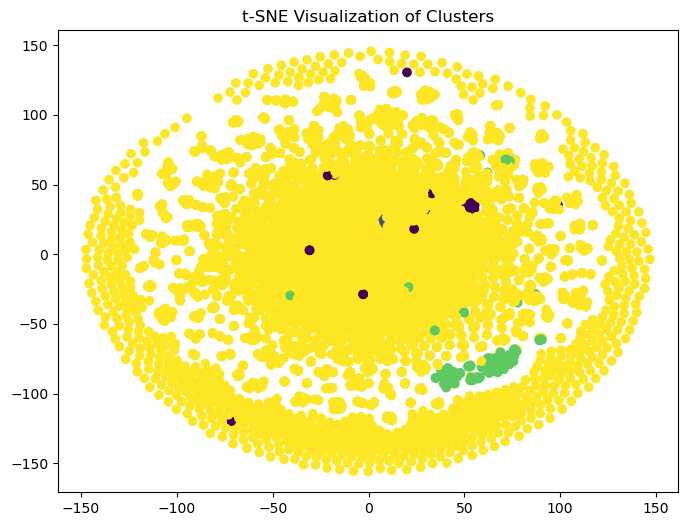

In [95]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, init="random")
X_tsne = tsne.fit_transform(doc_term_matrix)

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('t-SNE Visualization of Clusters')
plt.show()

In [96]:
# create a dataframe for each cluster, containing all the records of the cluster
kmeans_cluster_0 = df_grouped[df_grouped['KMeans_Cluster'] == 0]
kmeans_cluster_1 = df_grouped[df_grouped['KMeans_Cluster'] == 1]
kmeans_cluster_2 = df_grouped[df_grouped['KMeans_Cluster'] == 2]
kmeans_cluster_3 = df_grouped[df_grouped['KMeans_Cluster'] == 3]
kmeans_cluster_4 = df_grouped[df_grouped['KMeans_Cluster'] == 4]

lda_cluster_0 = df_grouped[df_grouped['LDA_Cluster'] == 0]
lda_cluster_1 = df_grouped[df_grouped['LDA_Cluster'] == 1]
lda_cluster_2 = df_grouped[df_grouped['LDA_Cluster'] == 2]
lda_cluster_3 = df_grouped[df_grouped['LDA_Cluster'] == 3]
lda_cluster_4 = df_grouped[df_grouped['LDA_Cluster'] == 4]